<a href="https://colab.research.google.com/github/VoTanThinh/googlecolab/blob/main/MOBILEROBOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=dbf445a976cf2c3403ff3b3f6777d2a89f7260278ad24be63e31f77b159b52b1
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-19-1884269d770b>:73: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-19-1884269d770b>:74: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-19-1884269d770b>:75: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)


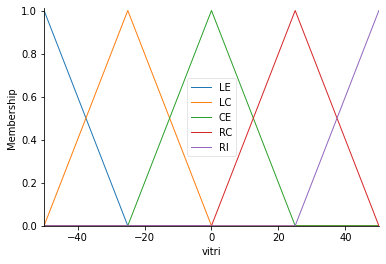

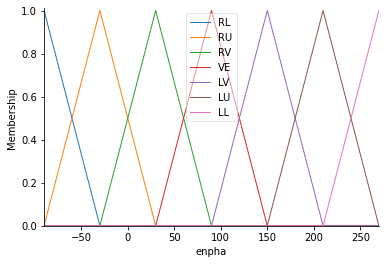

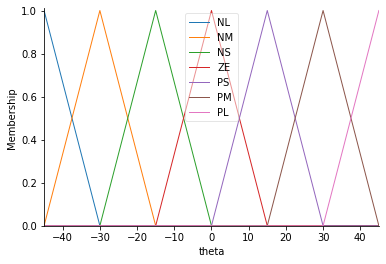

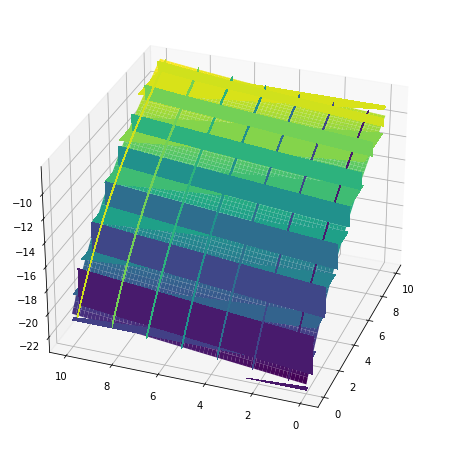

In [19]:
from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

vitri = np.linspace(-50,50,61) # chia khoang 0-10 thanhf 61 phaanf thuw
enpha= np.linspace(-90,270,61)
theta= np.linspace(-45,45,61)

vitri= ctrl.Antecedent(vitri,'vitri')
enpha= ctrl.Antecedent(enpha,'enpha')


theta = ctrl.Consequent(theta,'theta')


names1 = ['LE','LC','CE','RC','RI'] # gia tri phai laf ler 
names2 = ['RL','RU','RV','VE','LV','LU','LL']
names3=['NL','NM','NS','ZE','PS','PM','PL']

vitri.automf(names=names1) # chia khoan cho tung bieeur ddofo teen dg bieu do
enpha.automf(names=names2)
theta.automf(names=names3)

vitri.view()
enpha.view()
theta.view()

rule0 = ctrl.Rule(antecedent=((vitri['LE']&enpha['RL'])|(vitri['LC']&enpha['RL'])|(vitri['LE']&enpha['RU'])
|(vitri['LC']&enpha['RU'])|(vitri['LE']&enpha['RV'])),consequent=theta['NL'], label= 'rule NL')

rule1 = ctrl.Rule(antecedent=((vitri['CE']&enpha['RL'])|(vitri['RC']&enpha['RL'])|(vitri['CE']&enpha['RU'])
|(vitri['LC']&enpha['RV'])|(vitri['LE']&enpha['VE'])|(vitri['LC']&enpha['VE'])|(vitri['LE']&enpha['LV'])),consequent=theta['NM'], label= 'rule NM')

rule2 = ctrl.Rule(antecedent=((vitri['RI']&enpha['RL'])|(vitri['RC']&enpha['RU'])|(vitri['CE']&enpha['RV'])
|(vitri['LC']&enpha['LV'])|(vitri['LE']&enpha['LU'])),consequent=theta['NS'], label= 'rule  NS')

rule3 = ctrl.Rule(antecedent=((vitri['CE']&enpha['VE'])
),consequent=theta['NS'], label= 'rule NS')

rule4 = ctrl.Rule(antecedent=((vitri['RI']&enpha['RU'])|(vitri['RC']&enpha['RV'])|(vitri['CE']&enpha['LV'])
|(vitri['LC']&enpha['LU'])|(vitri['LE']&enpha['LL'])),consequent=theta['PS'], label= 'rule PS')

rule5 = ctrl.Rule(antecedent=((vitri['RI']&enpha['RV'])|(vitri['RC']&enpha['VE'])|(vitri['RI']&enpha['VE'])
|(vitri['RC']&enpha['LV'])|(vitri['CE']&enpha['LU'])|(vitri['LC']&enpha['LL'])|(vitri['CE']&enpha['LL'])),consequent=theta['PM'], label= 'rule PM')

rule6 = ctrl.Rule(antecedent=((vitri['RI']&enpha['LV'])|(vitri['RC']&enpha['LU'])|(vitri['RI']&enpha['LU'])
|(vitri['RC']&enpha['LL'])|(vitri['RI']&enpha['LL'])),consequent=theta['PL'], label= 'rule PL')


system = ctrl.ControlSystem(rules=[rule0,rule1,rule2, rule3, rule4, rule5, rule6])


sim = ctrl.ControlSystemSimulation(system, flush_after_run= 61*61+1)
upsampled = np.linspace(00,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['vitri'] = x[i,j]
    sim.input['enpha'] = y[i,j]
    
    sim.compute()
    z[i,j] = sim.output['theta']
    
#phaanf hien thi
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d') #vị trí tọa độ 1 1 1
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)
